In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

In [2]:
file_path= 'sample_airbnb.json'

with open(file_path,'r') as file:
    airbnb = json.load(file)

In [3]:
Hotel_details = []

for hotel in airbnb:

    data = dict(Id                      = hotel['_id'],
                Listing_url             = hotel['listing_url'],
                Name                    = hotel['name'],
                Description             = hotel['description'],
                Neighborhood_overview   = hotel['neighborhood_overview'],
                Transit                 = hotel['transit'],
                Access                  = hotel['access'],
                House_rules             = hotel['house_rules'],
                Property_type           = hotel['property_type'],
                Street                  = hotel['address']['street'],
                Suburb                  = hotel['address']['suburb'],
                Government_area         = hotel['address']['government_area'],
                Market                  = hotel['address']['market'],
                Country                 = hotel['address']['country'],
                Country_code            = hotel['address']['country_code'],
                Coordinates             = hotel['address']['location']['coordinates'],
                Cancellation_policy     = hotel['cancellation_policy'])
    Hotel_details.append(data)

In [4]:
Hotel_info = pd.DataFrame(Hotel_details)

In [5]:
# Data Preprocessing:

Hotel_info['Coordinates']=Hotel_info['Coordinates'].astype(str)

Hotel_info['Coordinates']=Hotel_info['Coordinates'].str.replace("[","")
Hotel_info['Coordinates']=Hotel_info['Coordinates'].str.replace("]","")

lat_long = Hotel_info['Coordinates'].str.split(",", expand= True)

Hotel_info['Latitude']=lat_long[0]
Hotel_info['Longitude']=lat_long[1]

Hotel_info.drop('Coordinates', axis = 1, inplace=True)

Hotel_info[['Latitude','Longitude']]=Hotel_info[['Latitude','Longitude']].astype(dtype='float64')
Hotel_info['Id']= Hotel_info['Id'].astype(dtype= 'int64')

In [6]:
Room_Details=[]

for room in airbnb:
    data1 = dict(Id = room['_id'],
                Images = room['images']['picture_url'],
                Room_type = room['room_type'],
                Bed_type = room['bed_type'],
                Minimum_nights = room['minimum_nights'],
                Maximum_nights = room['maximum_nights'],
                Accomodates = room['accommodates'],
                Bedrooms = room.get('bedrooms'),
                Beds = room.get('beds'),
                Bathrooms = room.get('bathrooms'),
                Amenities = room['amenities'],
                Price = room['price'],
                Weekly_price=room.get('weekly_price'),
                Monthly_price=room.get('monthly_price'),
                Security_deposit = room.get('security_deposit'),
                Cleaning_fee = room.get('cleaning_fee'),
                Availability_30=room['availability']['availability_30'],
                Availability_60=room['availability']['availability_60'],
                Availability_90=room['availability']['availability_90'],
                Availability_365=room['availability']['availability_365'])
    Room_Details.append(data1)


In [7]:
Room_info = pd.DataFrame(Room_Details)

In [8]:
# Data Pre Processing:

Room_info['Cleaning_fee']=Room_info['Cleaning_fee'].fillna(0)
Room_info['Security_deposit']=Room_info['Security_deposit'].fillna(0)
Room_info['Bathrooms']=Room_info['Bathrooms'].fillna(0)
Room_info['Beds']=Room_info['Beds'].fillna(0)
Room_info['Bedrooms']=Room_info['Bedrooms'].fillna(0)
Room_info['Weekly_price']=Room_info['Weekly_price'].fillna(0)
Room_info['Monthly_price']=Room_info['Monthly_price'].fillna(0)


Room_info['Amenities'] = [', '.join(map(str, x)) if isinstance(x, list) else '' for x in Room_info['Amenities']]

Room_info[['Id','Minimum_nights','Maximum_nights','Bedrooms','Beds','Bathrooms']]=Room_info[['Id','Minimum_nights','Maximum_nights','Bedrooms','Beds','Bathrooms']].astype(dtype='int64')
Room_info[['Price','Weekly_price','Monthly_price','Security_deposit','Cleaning_fee']]=Room_info[['Price','Weekly_price','Monthly_price','Security_deposit','Cleaning_fee']].astype(dtype='int64')


In [9]:
Host_details=[]

for host in airbnb:
    data2= dict(
            Id=host['_id'],
            Host_id=host['host']['host_id'],
            Host_url=host['host']['host_url'],
            Host_name=host['host']['host_name'],
            Host_location=host['host']['host_location'],
            Host_about=host['host']['host_about'],
            Host_picture_url=host['host']['host_picture_url'],
            Host_neighbourhood=host['host']['host_neighbourhood'],
            Host_response_rate=host['host'].get('host_response_rate'),
            Host_total_listings=host['host']['host_total_listings_count'],
            Host_verifications=host['host']['host_verifications']
            )
    Host_details.append(data2)

In [10]:
Host_info=pd.DataFrame(Host_details)


In [11]:
# Data Preprocessing:

Host_info['Host_response_rate']=Host_info['Host_response_rate'].fillna(0)
Host_info[['Id','Host_response_rate']]=Host_info[['Id','Host_response_rate']].astype(dtype = 'int64')
Host_info['Host_verifications'] = [', '.join(map(str, x)) if isinstance(x, list) else '' for x in Host_info['Host_verifications']]

In [12]:
Review_details=[]

for i in airbnb:
    data=dict(
                Id=i['_id'],
                First_review=i.get('first_review'),
                Last_review=i.get('last_review'),
                Total_reviews=i['number_of_reviews'],
                Overall_score=i['review_scores'].get('review_scores_accuracy'),
                Cleanliness_score=i['review_scores'].get('review_scores_cleanliness'),
                Checkin_score=i['review_scores'].get('review_scores_checkin'),
                Communication_score=i['review_scores'].get('review_scores_communication'),
                Location_score=i['review_scores'].get('review_scores_communication'),
                Value_score=i['review_scores'].get('review_scores_value'),
                Rating=i['review_scores'].get('review_scores_rating'))
    
    Review_details.append(data)


In [13]:
Review_info = pd.DataFrame(Review_details)

In [14]:
# Data preprocessing:

Review_info[['First_review','Last_review']]=Review_info[['First_review','Last_review']].fillna('No reviews yet')
Review_info[['Id','Overall_score','Cleanliness_score','Checkin_score','Communication_score','Location_score','Value_score','Rating']]=Review_info[['Id','Overall_score','Cleanliness_score','Checkin_score','Communication_score','Location_score','Value_score','Rating']].fillna(0).astype(dtype='int64')

In [15]:
# Merging all dataframes, and creating 1 main dataframe.

In [16]:
airbnb_df=pd.concat([Hotel_info,Room_info,Host_info,Review_info], axis = 1)

In [17]:
# CSV Conversion:

airbnb_df.to_csv("Airbnb.csv")
airbnb_df

,Id,Listing_url,Name,Description,Neighborhood_overview,Transit,Access,House_rules,Property_type,Street,...,First_review,Last_review,Total_reviews,Overall_score,Cleanliness_score,Checkin_score,Communication_score,Location_score,Value_score,Rating
0,1003530,https://www.airbnb.com/rooms/1003530,New York City - Upper West Side Apt,"Murphy bed, optional second bedroom available....",Great neighborhood - many terrific restaurants...,"Conveniently located near 1, 2, 3, B & C subwa...",New York City!,No smoking is permitted in the apartment. All ...,Apartment,"New York, NY, United States",...,2013-04-29 04:00:00,2018-08-12 04:00:00,70,10,9,10,10,10,10,94
1,10133554,https://www.airbnb.com/rooms/10133554,Double and triple rooms Blue mosque,We are on the central city Blue mosque 5 minu...,Cankurtaran mahallesi akbıyık caddesi no 22 Su...,Tram 5 minutes metro 10 minutes Bus 10 minutes,"We have bathroom,wc,İnternet in rooms and unde...",,Bed and breakfast,"Fatih , İstanbul, Turkey",...,2017-05-04 04:00:00,2018-05-07 04:00:00,29,9,9,10,10,10,9,92
2,10059872,https://www.airbnb.com/rooms/10059872,"Soho Cozy, Spacious and Convenient","Clean, fully furnish, Spacious 1 bedroom flat ...",,,,,Apartment,"Hong Kong, Hong Kong Island, Hong Kong",...,2015-12-19 05:00:00,2018-03-27 04:00:00,3,10,10,10,10,10,8,100
3,10084023,https://www.airbnb.com/rooms/10084023,City center private room with bed,House is located 5mins walk from Sham Shui Po ...,"Cheapest food, electronic device, clothing and...","Close to 3 different MTR Station, Sham shui Po...","Living Room , Kitchen and Toilet, All cooking ...","1. 禁止吸煙, 只限女生入住 (除得到批准) No smoking and only fe...",Guesthouse,"Hong Kong , 九龍, Hong Kong",...,2015-12-22 05:00:00,2019-03-01 05:00:00,81,10,8,10,10,10,10,92
4,10091713,https://www.airbnb.com/rooms/10091713,Surry Hills Studio - Your Perfect Base in Sydney,"This spacious, light filled studio has everyth...",Surry Hills is a vibrant eclectic community an...,Travel Card 'Opal' travel cards work on all Sy...,You have full use of the entire studio and com...,"No smoking: No smoking any substance, includi...",Apartment,"Surry Hills, NSW, Australia",...,2016-12-29 05:00:00,2018-03-18 04:00:00,64,10,9,10,10,10,9,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,9985696,https://www.airbnb.com/rooms/9985696,Kadıköy-Altıyol,Kadıköy merkezde 2+1 dairem vardır.Çok kalabal...,,,,,House,"Kadıköy, İstanbul, Turkey",...,No reviews yet,No reviews yet,0,0,0,0,0,0,0,0
5551,9993190,https://www.airbnb.com/rooms/9993190,Just Steps from the Ocean at Premier Platinum ...,Relax Hawaiian Style in Gated Community on Oce...,Location: Located at the south end of Lahaina ...,You can walk to most attractions within Lahain...,Guests will have access to the 3 pools in the ...,"As a guest of Coconut Condos, I agree to the f...",Townhouse,"Lahaina, HI, United States",...,2016-04-06 04:00:00,2018-08-20 04:00:00,15,10,9,10,10,10,9,92
5552,9887054,https://www.airbnb.com/rooms/9887054,Quarry Bay fully furnished studio C,Newly renovated studio flat with full furniture.,,,,,Apartment,"Hong Kong, Hong Kong Island, Hong Kong",...,2016-10-02 04:00:00,2017-01-01 05:00:00,4,10,9,10,10,10,9,85
5553,9907907,https://www.airbnb.com/rooms/9907907,Large double room in Bondi,A bright large double room is available in a b...,,The flat is exactly half way between the shops...,"Guests will have access to the full residence,...",We like to keep the flat clean and tidy so wou...,Apartment,"Bondi Beach, NSW, Australia",...,No reviews yet,No reviews yet,0,0,0,0,0,0,0,0


In [18]:
#Exploratory Data Analysis (EDA) : Descriptive Analysis:

# Q-1:
# Statistical Data of Price:

Price=airbnb_df['Price']

avg_price = np.average(Price)
var_price = np.var(Price)
std_price = np.std(Price)
median_price = np.median(Price)
min_price = np.min(Price)
max_price = np.max(Price)

print(avg_price)
print(std_price)
print(median_price)
print(min_price)
print(max_price)

# Create a dictionary with the statistical values
stats_dict = {
    'Statistics': ['Average Price', 'Standard Deviation', 'Median Price', 'Minimum Price', 'Maximum'],
    'Values': [avg_price, std_price, median_price, min_price, max_price]
}

# Create a DataFrame from the dictionary
stats_df = pd.DataFrame(stats_dict)

# Prepare data for plotting
statistics = {
    'Average Price': avg_price,
    'Standard Deviation': std_price,
    'Median Price': median_price,
    'Min Price': min_price,
    'Max Price': max_price}


# Create Plotly horizontal bar chart
fig = go.Figure(go.Bar(
    x=list(statistics.values()),
    y=list(statistics.keys()),
    orientation='h',
    marker=dict(color=['skyblue', 'orange', 'green', 'red', 'purple', 'brown']),
    hoverinfo='x+y',
    text=list(statistics.values()),
    textposition='auto'))

# Update layout
fig.update_layout(
    title='Summary Statistics for Price',
    xaxis_title='Values',
    yaxis_title='Statistics',
    yaxis=dict(tickmode='linear'))

# Show the plot
fig.show()

278.76615661566154
842.1397205652012
129.0
9
48842


In [19]:
# EDA-2:
# Average Price of hotels in Various Countries

grouped_data = airbnb_df.groupby('Country')['Price'].mean().reset_index()
Coun_price_df=pd.DataFrame(grouped_data)

Coun_price_df.rename(columns={'Price': 'Mean_Price'}, inplace=True)

# Create Plotly plot with hover functionality
fig = px.bar(Coun_price_df, x='Country', y='Mean_Price', color='Mean_Price', 
                title='Average Price of Hotels in Various Countries',
                labels={'Country': 'Country', 'Mean_Price': 'Mean Price'},
                color_continuous_scale='pinkyl')

# Update layout to match the desired aesthetics
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Mean Price',
    xaxis=dict(tickangle=45)
)

# Show the plot
fig.show()

In [20]:
# EDA-3:
# Average Price of All Room types

grouped_data = airbnb_df.groupby('Room_type')['Price'].mean().reset_index()
rt_price_df=pd.DataFrame(grouped_data)

# Create Plotly bar plot with hover functionality
fig = px.bar(rt_price_df, x='Room_type', y='Price', 
                title='Average Price of all Room Types',
                labels={'Room_type': 'Room Type', 'Price': 'Price'},
                color='Price',  
                color_continuous_scale='viridis') 

# Update layout to match the desired aesthetics
fig.update_layout(
    xaxis_title='Room Type',
    yaxis_title='Price',
    xaxis=dict(tickangle=45)
)

# Show the plot
fig.show()

In [21]:
# EDA-4:
# Average Ratings of all Property Types

grouped_data = airbnb_df.groupby('Property_type')['Rating'].mean().reset_index()
pt_rating_df = pd.DataFrame(grouped_data)

# Plotly Express bar chart with hovering
fig = px.bar(grouped_data, x='Property_type', y='Rating', color='Property_type',
                title='Average Ratings of all Property Types',
                labels={'Property_type': 'Property Type', 'Rating': 'Rating'},
                hover_name='Property_type', hover_data={'Rating': True})

# Customize layout if needed
fig.update_layout(xaxis_title='Property Type', yaxis_title='Rating', xaxis_tickangle=60)

# Show the plot
fig.show()

                 Price  Accomodates  Bedrooms      Beds  Bathrooms  \
Price         1.000000     0.152593  0.143844  0.133653   0.173426   
Accomodates   0.152593     1.000000  0.740176  0.821770   0.571918   
Bedrooms      0.143844     0.740176  1.000000  0.728327   0.625439   
Beds          0.133653     0.821770  0.728327  1.000000   0.598503   
Bathrooms     0.173426     0.571918  0.625439  0.598503   1.000000   
Cleaning_fee  0.155212     0.350931  0.271706  0.267370   0.264228   

              Cleaning_fee  
Price             0.155212  
Accomodates       0.350931  
Bedrooms          0.271706  
Beds              0.267370  
Bathrooms         0.264228  
Cleaning_fee      1.000000  


Text(0.5, 1.0, 'Correlation between Room Price and Key Room structures')

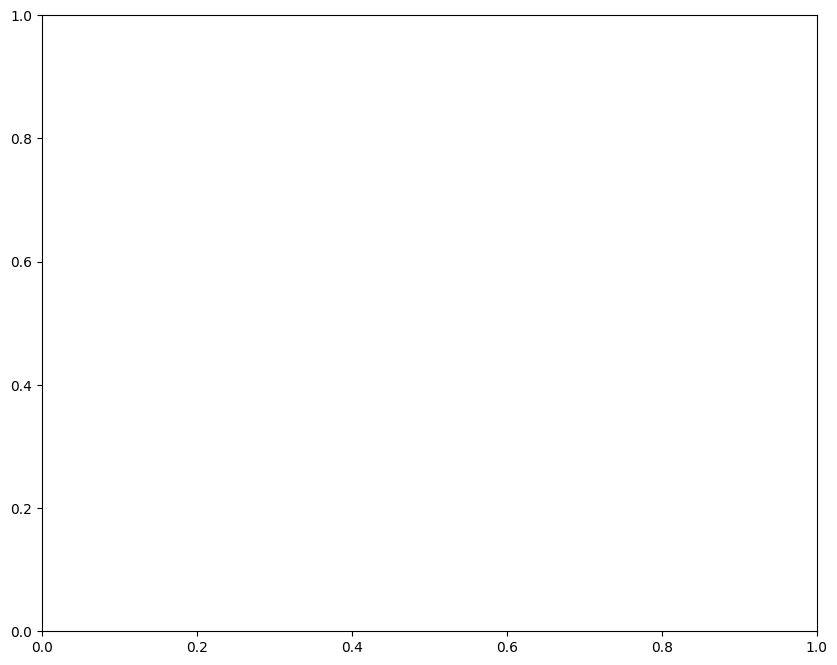

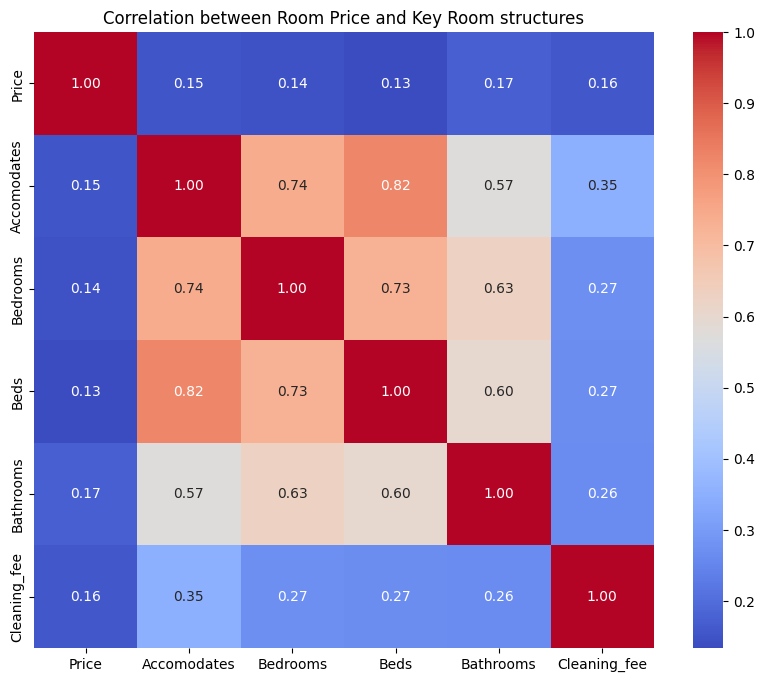

In [22]:
# EDA -5:

# Correlation between Room Price and Key Room structures

Selected_columns= airbnb_df[['Price','Accomodates','Bedrooms','Beds','Bathrooms','Cleaning_fee']]

room_df=pd.DataFrame(Selected_columns)

# calculating the correlation matrix

correlation_matrix = room_df.corr()

fig, ax = plt.subplots(figsize=(10, 8))

print(correlation_matrix)

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation between Room Price and Key Room structures')


                      Price  Total_reviews  Overall_score  Cleanliness_score  \
Price              1.000000      -0.065519      -0.110056          -0.108491   
Total_reviews     -0.065519       1.000000       0.344345           0.343885   
Overall_score     -0.110056       0.344345       1.000000           0.984794   
Cleanliness_score -0.108491       0.343885       0.984794           1.000000   
Location_score    -0.107542       0.341764       0.988710           0.980907   
Rating            -0.107399       0.337567       0.990936           0.987537   

                   Location_score    Rating  
Price                   -0.107542 -0.107399  
Total_reviews            0.341764  0.337567  
Overall_score            0.988710  0.990936  
Cleanliness_score        0.980907  0.987537  
Location_score           1.000000  0.988850  
Rating                   0.988850  1.000000  


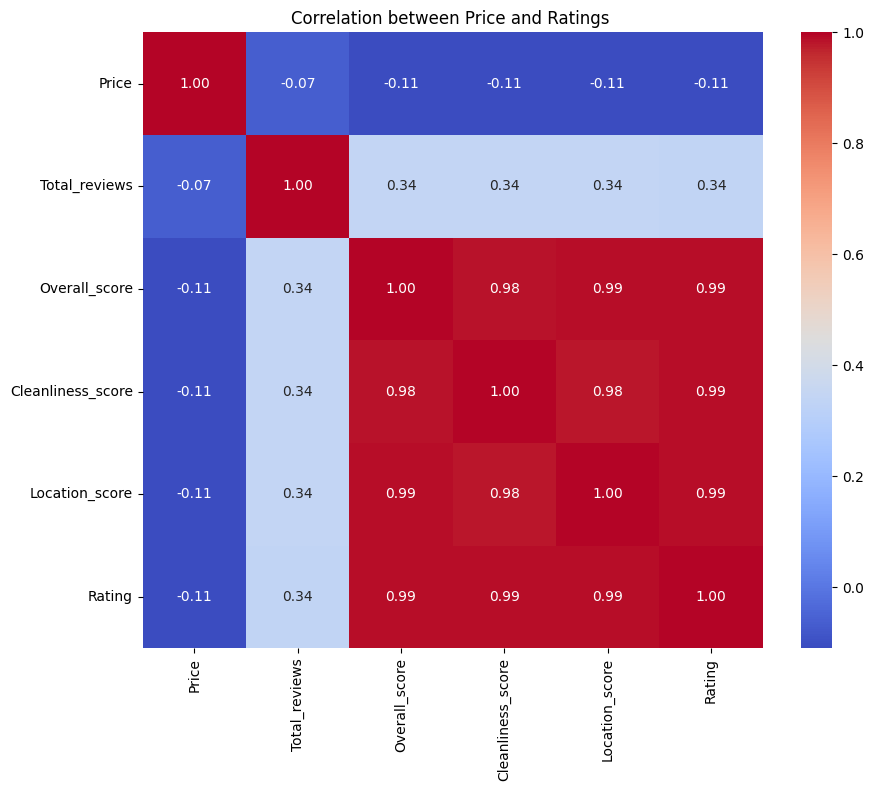

In [23]:
# EDA-7:
# Correlation between Price and Ratings 
# Corelation Matrix Heatmap:

columns=airbnb_df[['Price','Total_reviews','Overall_score','Cleanliness_score','Location_score','Rating']]

review_df=pd.DataFrame(columns)


correlation_matrix = review_df.corr()

print(correlation_matrix)

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation between Price and Ratings ')
plt.show()


In [24]:
# Ques-1:

# Top 10 Accomodation with highest price

clm=airbnb_df[['Name','Price']]
df=pd.DataFrame(clm)

sorted_df=df.sort_values(by="Price", ascending=False)

top_10_rows=sorted_df.head(10)

new_df = top_10_rows.reset_index(drop=True)

top_10_hotels=pd.DataFrame(new_df)

# Plotly bar chart with hovering
fig = px.bar(top_10_hotels, x='Name', y='Price', hover_data={'Price': ':.2f'},
                labels={'Name': 'Hotel Name', 'Price': 'Price'},
                title='Top 10 Hotels with Maximum Room Price',
                color='Price',color_continuous_scale='rainbow')
fig.update_layout(xaxis_title='Hotel Name', yaxis_title='Price')
fig.show()

In [25]:
# Ques-2:

# Top 10 Accomodation with Minimum Price

clm=airbnb_df[['Name','Price']]
df=pd.DataFrame(clm)

sorted_df=df.sort_values(by="Price")

top_10_rows=sorted_df.head(10)


new_df = top_10_rows.reset_index(drop=True)

top_10_hotels_low=pd.DataFrame(new_df)

# Plotly bar chart with hovering
fig = px.bar(top_10_hotels_low, x='Name', y='Price', hover_data={'Price': ':.2f'},
                labels={'Name': 'Hotel Name', 'Price': 'Price'},
                title='Top 10 Hotels with Minimum Room Price',
                color='Price',color_continuous_scale='viridis')
fig.update_layout(xaxis_title='Hotel Name', yaxis_title='Price')
fig.show()

In [26]:
# Ques - 3

#Number of Hotels in Countries:

# Count the number of hotels in each country
hotel_count = airbnb_df['Country'].value_counts().reset_index()
hotel_count.columns = ['Country', 'Count']

fig = px.pie(hotel_count, values='Count', names='Country',
                labels={'Country': 'Country'},
                title='Hotel Distribution by Country')
fig.show()

In [27]:
#Ques - 4:

# Top 10 Host Names with Highest Host Listings:


# Calculate the count of host listings for each host name
host_listings_count = airbnb_df['Host_name'].value_counts().reset_index()
host_listings_count.columns = ['Host_name', 'Host_total_listings']

# Identify the host name with the highest count
highest_host_name = host_listings_count.loc[0, 'Host_name']
highest_host_count = host_listings_count.loc[0, 'Host_total_listings']

top_10_hosts = host_listings_count.head(10)

# Plotting the host name with the highest count using Plotly with hovering
fig = px.pie(top_10_hosts, values='Host_total_listings', names='Host_name',
                labels={'Host_name': 'Host Name', 'Host_total_listings': 'Listing Count'},
                title='Top 10 Host Names with Highest Host Listings')

fig.show()

In [28]:
# ques - 5:

# Hotel Count with Maximum Ratings:

# Calculate the count of hotels for each rating

rating_counts = airbnb_df['Rating'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Id']

sorted_df=rating_counts.sort_values(by="Rating", ascending=False)

top_10_ratings = sorted_df.head(10).reset_index(drop=True)

# Plotting hotel count by rating using Plotly bar chart
fig = px.bar(top_10_ratings, x='Rating', y='Id',
                labels={'Rating': 'Rating', 'Id': 'Hotel Count'},
                title=' Hotel Count with Maximum Ratings',
                color='Rating',color_continuous_scale='thermal')

fig.update_layout(xaxis_title='Rating', yaxis_title='Hotel Count')
fig.show()

In [29]:
# Ques - 6:

# Top 10 Hotels with highest Ratings:

clm=airbnb_df[['Name','Rating',"Country_code"]]

df=pd.DataFrame(clm)

# Identify the top 10 hotels with maximum ratings
top_10_hotels = df.sort_values(by='Rating', ascending=False).head(10)

# Create the bar chart
fig = px.bar(top_10_hotels, x='Name', y='Rating',
                labels={'Name': 'Hotel Name', 'Rating': 'Rating'},
                title='Top 10 Hotels with Maximum Ratings',
                color='Country_code',
                color_continuous_scale='Viridis')

fig.update_layout(xaxis_title='Hotel Name', yaxis_title='Rating')
fig.show()

In [30]:
# Ques - 7:
# Average Avilability of Hotel Rooms in Every Country per month.

columns=airbnb_df[['Country','Availability_30']]

df=pd.DataFrame(columns)

avg_availability_by_country = df.groupby('Country')['Availability_30'].mean().reset_index()

df1= avg_availability_by_country.sort_values(by='Availability_30', ascending=False).head(10)

# Create the sunburst plot
fig = px.sunburst(avg_availability_by_country, path=['Country'], values='Availability_30',
                    color='Availability_30',  # Color by availability
                    color_continuous_scale='turbid',  # Optional: Apply a color scale
                    labels={'Availability_30': 'Average Availability'},
                    title='Average Avilability of Hotel Rooms in Every Country per month')

fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))  # Adjust the margins for better display
fig.show()


In [31]:
# Ques - 8:
# Room types with maximum ratings in Every Countries

clm=airbnb_df[['Room_type','Rating','Country']]

df=pd.DataFrame(clm)

# Get the top-rated room type for each country
top_rooms = df.groupby('Country').apply(lambda x: x.loc[x['Rating'].idxmax()]).reset_index(drop=True)


# Plotting
fig = px.bar(top_rooms, x='Country', y='Rating', color='Room_type',
                title='Top Maximum Rated Room Types by Country',
                labels={'Rating': 'Maximum Rating', 'Room_type': 'Room Type'})
fig.show()

C:\Users\goddy\AppData\Local\Temp\ipykernel_45248\367301693.py:9: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

